# Text Classification Using NLP

**NLP** (Natural Language Processing) is a subfield of computer science and artificial intelligence concerned with interactions between computers and human languages. By using NLP we will be applying machine learning algorithms to text and speech.

Some of the uses of NLP includes speech recognition, document summarization, translation, name entity recognition,  spam detection, question answering, autocomplete, predictive typing, etc.

**NLTK (Natural Language Toolkit)**
It is a standard library for Python for processing language data and easy-to-use interfaces to many corpora and lexical resources. It contains as well a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning. All free, open source and community-driven.

The basic steps for text processing include:
1. Sentence and Word Tokenization
2. Stemming and Lemmatization
3. Stop Words
4. Regex
5. Bag-of-Words
6. TF-IDF


## 1a. Sentence Tokenization
Also called sentence segmentation is the problem of dividing a string of written language into its component. The idea here is simple. In many languages we can simply split apart the sensences at every punctuation mark.
However we need to consider the non trivial problem of using full stop character for abbreviations as well. When processing plain text, tables of abbreviations can help us to prevent incorrect assignment of sentence boundaries. In many cases we use libraries to do the job for us...

The function that perform this operation for us is ***nltk.sent_tokenize***


## 1b. Word Tokenization
Also called word segmentation is the problem of dividing a sentence into its words. In many languages including English space is a good approximation of a word divider.
However similarly as with sentence tokenization we have a similar issue in word tokenization with copound noums that in ocassions are written with a space. As before we use a library to achieve the desired results which in this case is ***nltk.word_tokenize***


## 2. Stemming and Lemmatization
Stemming nad Lemmatization are a special case of normalization.
The same word may have multiple variations for grammatical reasons (play playing played). The process of reducing all these variations or inflection forms into their root is the process of stemming. Mostly it is a crude process that chops the ending of the words to achieve its goal.

Lemmatization works in a similar way but goes one step further and not only reduces variations of the same word, but groups into a *common base form* (known as *lemma*) words with similar semantics (run, running, jogging...). The process in lemmatization differs from stemming since it performs a morphological analysis. <br>
For example the lemma of "better" is "good" but in the case of meeting which can be either the base form of a noun or a form of a verb (“to meet”) lemmatization attempts to select the correct lemma depending on the context.


## 3. Stop Words
Stop words are words which are filtered out before or after processing the text because they are considered irrelevant. When applying machine learning to text these words can add a lot of noise. Words included in the stop words are common words such as “and”, “the” or “a” but there is no single universal list of stopwords and the list can change depending on your application. <br>

The NLTK tool has a predefined list of stopwords. If you use it for the first time you will need to download the stop words like this:
> ***nltk.download(“stopwords”)***

After that we can use it in our code:
> ***from nltk.corpus import stopwords***


## 4. Regex
A **regular expression**, **regex**, or **regexp** is a sequence of characters that define a search pattern.
We use regex to apply additional filtering to our text. For example, we can remove all the non-words characters like punctuation marks spetial characters, etc. In python we can use the re.sub function to replace the matches for the patterns that we may have defined.

To understand the basic structure we have the following expressions:
. - match any character except newline
- \w - match word
- \W - match anything that is not word
- \d - match digit
- \D - match anything that is not digit
- \s - match whitespace
- \S - match not whitespace
- [abc] - match any of a, b, or c
- [^abc] - not match a, b, or c
- [a-g] - match a character between a & g

Regular expressions use the backslash character ('\') to indicate special forms or to allow special characters to be used without invoking their special meaning. This collides with Python’s usage of the same character for the same purpose in string literals; for example, to match a literal backslash, one might have to write '\\\\' as the pattern string, because the regular expression must be \\, and each backslash must be expressed as \\ inside a regular Python string literal.

The easier solution is to use Python’s raw string notation for regular expression patterns; backslashes are not handled in any special way in a string literal prefixed with 'r'. So r"\n" is a two-character string containing '\' and 'n', while "\n" is a one-character string containing a newline. Usually, patterns will be expressed in Python code using this raw string notation.


## 5. Bag-of-Words
Machine learning algorithms do not work with raw text so we convert the text into vectors of numbers. This is called feature extraction. The bag-of-words model is a popular and simple feature extraction technique used when we work with text. It describes the occurrence of each word within a document.

To use this model we need to:
* Design a vocabulary of known words (also called tokens)
* Choose a measure of the presence of known words

All information about the grammar, order or structure is discarded and that’s why it’s called a bag of words. This model is trying to understand whether a known word occurs in a document, but don’t know where is that word in the document. The idea behind it is that similar documents have similar contents. Also from the content, we can learn about the meaning of the document.

The complexity of the bag-of-words model comes in deciding how to design the vocabulary of known words (tokens) and how to score the presence of known words. When the vocabulary size increases, the vector representation of the documents also increases. In the example above, the length of the document vector is equal to the number of known words. In some cases, we can have a huge amount of data and in this cases, the length of the vector that represents a document might be thousands or millions of elements. On the other side each document may contain only a few of the known words in the vocabulary.
At this point is clear that the vector representations will very sparse (it will contain a lot of zeros) but they still require memory and computational resources so using a bag-of-words model we decrease the number of known words as well as the required memory and resources. We can apply of the cleaning techniques that we have seen to create the bag-of-words model:
* Ignore cases (make all lowercase)
* Ignore punctuation
* Remove the stop words
* Lemmatization and Stemming
* Fix misspelled words

#### N-Gramps
Another more complex way to create a vocabulary is to use ***grouped words***. This changes the scope of the vocabulary and allows the bag-of-words model to get more details about the document. This approach is called ***n-grams***.

An n-gram is a sequence of a number of items (words, letter, numbers, digits, etc.). More specifically in the context of text corpora, n-grams refer to a sequence of words. A unigram is one word (n=1), a bigram is a sequence of two words (n=2), a trigram is a sequence of three words (n=3) etc. The “n” in the “n-gram” refers to the number of the grouped words. Not all possible n-grams are modeled, only the n-grams that appear in the corpus.

The bag-of-bigrams is more powerful than the bag-of-words approach. Unigrams don’t contain much information as compared to bigrams and trigrams. This is because n-grams capture the letter or word that is most likely to follow the given word. The longer the n-gram (higher n) the more context is captured.

As example: *My new car red*
All the biagrams are:
* my new
* new car
* car red


## 6. TF-IDF

#### Scoring Words
Once we have a vocabulary of known words, we need to score the occurrence of the words in our data.<br>
- A very simple approach is the binary approach (1 for presence, 0 for absence).

Some additional scoring methods are:
- Counts. Count the number of times each word appears in a document.
- Frequencies. Calculate the frequency that each word appears in document out of all the words in the document.

If we score by frequency the most frequent words in the document will have the highest scores. These frequent words may not contain as much in terms of informational compared with rarer and domain-specific words. One approach to fix that problem is to penalize words that are frequent across all the documents. This approach is called ***TF-IDF***.

**TF-IDF (term frequency-inverse document frequency)** is a statistical measure used to evaluate the importance of a word to a document in a collection or corpus. The TF-IDF scoring value increases proportionally to the number of times a word appears in the document, but it is offset by the number of documents in the corpus that contain the word.
Let’s see the formula used to calculate a TF-IDF score for a given term x within a document y.

\begin{equation*}
W_{x, y}  ​​​= ​​​tf_{x, y} ​​​\times ​​​log(\frac{N}{df_x})         
\end{equation*}

With:
- W<sub>x,y </sub>  term x within document y
- tf<sub>x,y </sub>  frequency of x in y
- df<sub>x </sub>  total number of documents

In python we use ***from sklearn.feature_extraction.text.TfidfVectorizer***

### Load Basic Libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext watermark
%watermark -v -m -p numpy,pandas,skmultilearn -g

import os
import sys
import re
from tqdm import tqdm
import yaml
import watermark
from math import floor
from pprint import pprint as pp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from pandas.plotting import register_matplotlib_converters    # for pandas_profiling

register_matplotlib_converters()                              # for pandas_profiling
sys.path.append(os.pardir)

CPython 3.7.3
IPython 7.5.0

numpy 1.16.4
pandas 0.24.2
skmultilearn unknown

compiler   : GCC 7.3.0
system     : Linux
release    : 5.0.0-20-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : 16c8fbdfbb73eb4dd8a46fe4574c95851d81e451


### Load Libraries of the project

In [2]:
from PIL import Image
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud
from src.text_func import *

### Constants

In [3]:
INPUT_DATA = "./data/raw/titles.csv"
OUTPUT_DATA = "./data/processed/titles.csv"
MODELS_FOLDER = "./models/"

### Load Data

The first step is to load the data to explore and evaluate the characteristics of the dataset. Structure, format, statistics of the data, distribution, etc.

In [4]:
titles_df = pd.read_csv(INPUT_DATA)

In [5]:
titles_df.head(5)

,title,score
0,U.S. Player Ratings: Wondolowski and Defense S...,1
1,Gyora Benedek's Hidato,1
2,This Is Why You Are Probably Broke And Stuff,0
3,"We Use 4 Of These A Day, And They're Kind Of T...",0
4,Another Creepy Example Of How Real Life Is Way...,0


In [6]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 2 columns):
title    1193 non-null object
score    1193 non-null int64
dtypes: int64(1), object(1)
memory usage: 18.7+ KB


In [7]:
titles_df.describe()

,score
count,1193.000000
mean,0.419111
std,0.493621
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
titles_df.profile_report()

As per the distribution of scores with 1 vs scores with 0:

In [9]:
good = titles_df['score'].sum()
bad = titles_df.shape[0] - good
df_freq = pd.DataFrame({'category': ['Good', 'Bad'], 'count': [good, bad]})

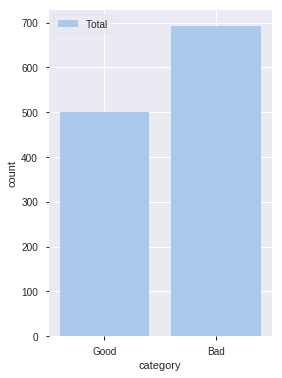

In [10]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(4, 6))

# Plot the total crashes
sns.set_color_codes("pastel")
g = sns.barplot(x="category", y="count", data=df_freq, label="Total", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True)
# ax.set(xlim=(800, 10), ylabel="", xlabel="Count per type")
ax.grid(linestyle='-', linewidth=1, which='both', axis='x')
sns.despine(left=True, bottom=True)

## Cleaning

We apply the following cleaning operations:
* Ignore cases (make all lowercase)
* Ignore punctuation
* Remove the stop words
* Lemmatization and Stemming
* Fix misspelled words

To ensure everything is in lowercase, remove accents and special characters as well as perform some standard replacements we apply the predefined function 'clean_text':

In [11]:
titles_df["clean_title"] = titles_df["title"].apply(clean_text)

Remove stop words and lemmatize:

In [12]:
stop_word_list = stopwords.words('english')
token = ToktokTokenizer()
lemma = WordNetLemmatizer()

def remove_stop_words_and_lemmatize(text, token_output=False):
    word_list = [x.strip() for x in token.tokenize(text)]
    output_list = [lemma.lemmatize(x) for x in word_list if not x in stop_word_list]
    
    if token_output:
        return output_list
    else:
        return ' '.join(output_list)

In [13]:
titles_df["clean_title"] = titles_df["clean_title"].apply(remove_stop_words_and_lemmatize)

In [14]:
titles_df["clean_title"].head(3)

0    united state player rating wondolowski defense...
1                                 gyora benedek hidato
2                                 probably broke stuff
Name: clean_title, dtype: object

## Visual Representation of the words

Before the next step in which we will process the text into its numerical representation we are going to plot some interesting graphs to gain a better understanding of the content.

First let's gather all text into a single entry:

In [15]:
all_text = ' '.join(titles_df["clean_title"].tolist())

### Worldcloud

Wordcloud creates a nice graph with the words in different sizes depending on how frequent these words are in the dataset. <br>
We customize the final result to avoid repetitions of the words by setting 'collocations' to False

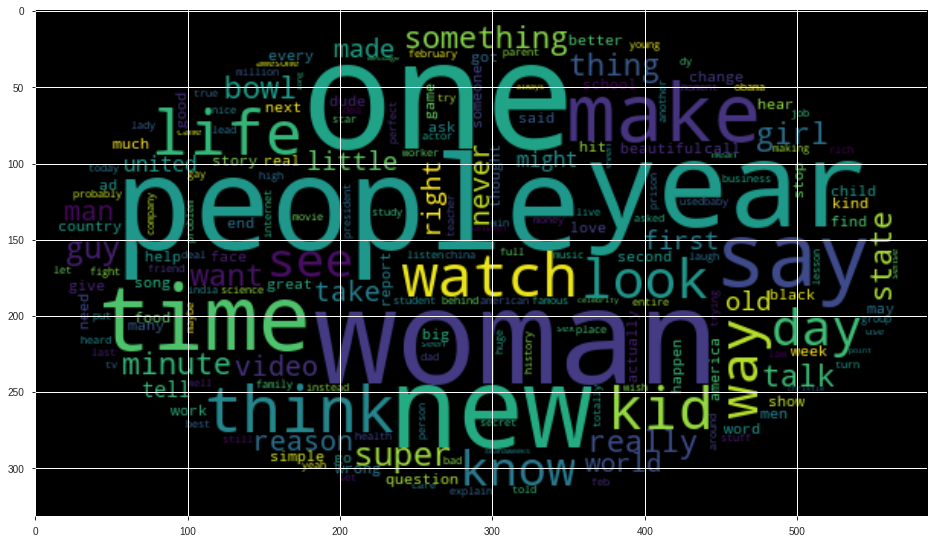

In [16]:
cloud_mask = np.array(Image.open("./data/fig/cloud_mask.png"))
wc = WordCloud(max_font_size=100, 
               max_words=200, 
               collocations=False, 
               background_color='black', 
               mask=cloud_mask).generate(all_text)
plt.figure(figsize=(16, 12))
plt.imshow(wc, interpolation='bilinear')

### Count per samples

Using the same set of words but now plotted using the more classical frequency distribution graph.

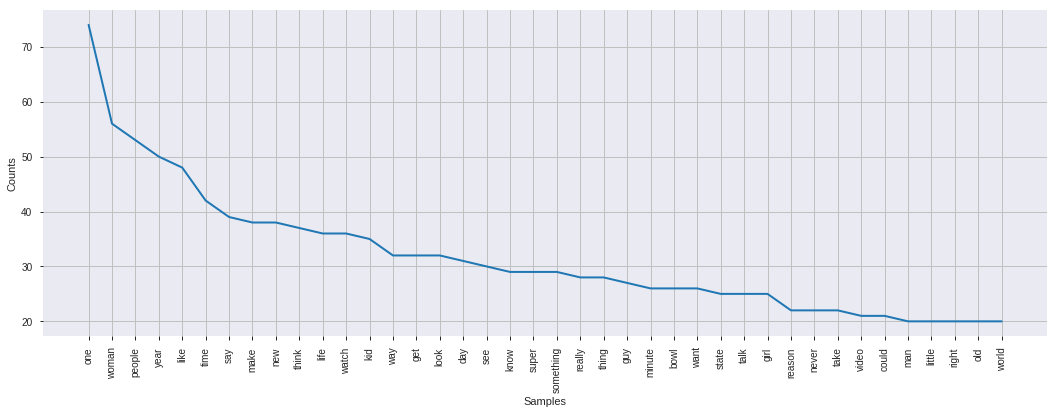

In [17]:
word_freq_dist = nltk.FreqDist(ToktokTokenizer().tokenize(all_text))
plt.figure(figsize=(18, 6))
word_freq_dist.plot(40)

## Feature Engineering

This is the process of using domain knowledge of the data to create features that make machine learning algorithms work. It requires domain knowledge and it can be tough to create new features but it can be very helpful for ML algorithms as they can be related to the prediction.

### Word cound per entry

In [18]:
titles_df['n_words'] = titles_df['clean_title'].str.split(' ').apply(len)

Text(0, 0.5, 'Count')

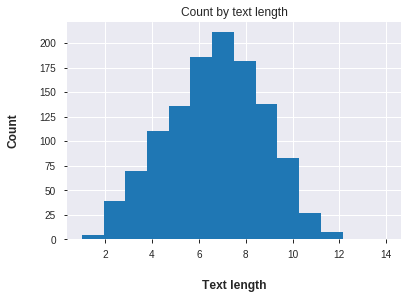

In [19]:
ax = titles_df['n_words'].hist(bins=14, range=[1, 14])
ax.set_title("Count by text length")
ax.set_xlabel("Text length", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Count", labelpad=20, weight='bold', size=12)

The result shows a normal distribution with titles between 1 and 12 words.

### Length or total characters

In [20]:
titles_df['characters'] = titles_df['clean_title'].apply(lambda x: len(x) - x.count(" "))

### Percentage of punctuation

In [21]:
import string

def punct_perc(text):
    counter = sum([1 for char in text if char in string.punctuation])
    return round(counter/(len(text) - text.count(" ")), 3) * 100

In [22]:
titles_df['punc'] = titles_df['title'].apply(punct_perc)

In [23]:
titles_df.head()

,title,score,clean_title,n_words,characters,punc
0,U.S. Player Ratings: Wondolowski and Defense S...,1,united state player rating wondolowski defense...,7,46,6.4
1,Gyora Benedek's Hidato,1,gyora benedek hidato,3,18,5.0
2,This Is Why You Are Probably Broke And Stuff,0,probably broke stuff,3,18,0.0
3,"We Use 4 Of These A Day, And They're Kind Of T...",0,use day kind worst,4,15,4.8
4,Another Creepy Example Of How Real Life Is Way...,0,another creepy example real life way scarier m...,9,47,1.6


## Verification of the features

We can try to visualize the length of words or characters versus the label that we are trying to predict.

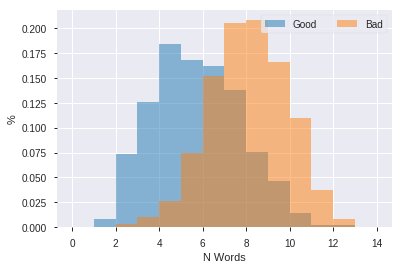

In [24]:
bins = np.linspace(0, 14, 15)

plt.hist(titles_df[titles_df["score"] == 1]["n_words"], bins, alpha=0.5, density=True, label='Good');
plt.hist(titles_df[titles_df["score"] == 0]["n_words"], bins, alpha=0.5, density=True, label='Bad');
plt.ylabel('%')
plt.xlabel('N Words');
plt.legend(ncol=2, loc="upper right", frameon=True);

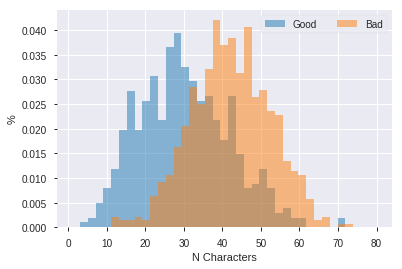

In [25]:
bins = np.linspace(1, 80, 40)

plt.hist(titles_df[titles_df["score"] == 1]["characters"], bins, alpha=0.5, density=True, label='Good');
plt.hist(titles_df[titles_df["score"] == 0]["characters"], bins, alpha=0.5, density=True, label='Bad');
plt.ylabel('%')
plt.xlabel('N Characters');
plt.legend(ncol=2, loc="upper right", frameon=True);

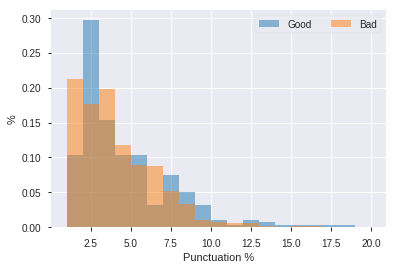

In [26]:
bins = np.linspace(1, 20, 20)

plt.hist(titles_df[titles_df["score"] == 1]["punc"], bins, alpha=0.5, density=True, label='Good');
plt.hist(titles_df[titles_df["score"] == 0]["punc"], bins, alpha=0.5, density=True, label='Bad');
plt.ylabel('%')
plt.xlabel('Punctuation %');
plt.legend(ncol=2, loc="upper right", frameon=True);

The number of words and the number of characters are closely related and in both cases we can see a difference in the media of the distributions which may help in the forcasting of the label.

## Text Representation (Bag of Words)

Most learning algorithms cannot process directly text documents and prefer numerical **feature vectors** with a fixed size rather than the raw text with variable length.

Therefore we have to represent and weight every document with respect to the set of textual features (e.g., the words that appear in the document). By applying the 'bag of words' model the occurance of words is taken into considration but not the order in which they appear in the document.

To explain in a simple way what "tf-idf" does, the terms weight is higher the more common the term is in the document, and the more uncommon in the collection. More detailed explenation at https://en.wikipedia.org/wiki/Tf%E2%80%93idf

The tf_idf function will convert the text to vectors and after that step we can use the new data to fit the model. 

When obtaining very long vectors there is the question if we really need that many features and we may be better off by selecting the best features instead of using them all. The method 'SelectKbest' allows to do precisely that (found in the sklearn.feature_selection package), after which Chi2 score can be used to select the features with the highest values for the test chi-squared.

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [28]:
n_estimators = 3000
tfidf = TfidfVectorizer(max_features=n_estimators,  # Number of features that we'll use in the bag of words
                        min_df=5,              # Minimum n. of documents in which a word must be present
                        max_df=0.80,           # Only the words that appear in a max of 80% of the docs
                        tokenizer=token.tokenize,
                        use_idf=True,
                        sublinear_tf=True,     # Use logarithmic form for frequency
                        norm='l2')             # Ensure that all feature vectors have a euclidian norm of 1
# Other parameters
#   ngram_range set to (1, 2) to indicate that we want to consider both unigrams and bigrams

In [29]:
X, y = titles_df["clean_title"], titles_df["score"]
X = tfidf.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.26387558,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [31]:
clf_random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
clf_random_forest.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
y_pred = clf_random_forest.predict(X_test)
print("Confusion Matrix:\n{}\n\n".format(confusion_matrix(y_test,y_pred)))
print("Classification Report:\n{}\n".format(classification_report(y_test,y_pred)))
print("Accuracy Score: {0:.3f}".format(accuracy_score(y_test, y_pred)))

Confusion Matrix:
[[119  29]
 [ 19  72]]


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       148
           1       0.71      0.79      0.75        91

    accuracy                           0.80       239
   macro avg       0.79      0.80      0.79       239
weighted avg       0.81      0.80      0.80       239


Accuracy Score: 0.799


Our machine learning model did not take much time to execute. One of the reasons for the quick training time is the fact that we had a relatively small training set. We had 1193 documents, of which we used 80% for training.

However in real-world scenarios we can have millions of documents. In such cases it can take hours or even days to train the algorithms. Therefore, it is recommended to save the model once it is trained.

#### Saving the model as a pickle object

In [33]:
with open(os.path.join(MODELS_FOLDER, 'text_classifier_random_forest.pickle'), 'wb') as picklefile:
    pickle.dump(clf_random_forest, picklefile)

### Comparison with other models

During the model evaluation it is very important to assess how the results of a statistical analysis will generalize to an independent data set. To do this we use cross-validation as is will allow us to limit problems like overfitting and give us an insight on how well the model will generalize.

In [34]:
# Definition of the models
clf_naive_bayes = GaussianNB()
clf_log_regression = LogisticRegression(solver='lbfgs', multi_class='ovr', random_state=42)
clf_svm = svm.LinearSVC()
clf_random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=42)
clf_extra_tree = ExtraTreeClassifier()
clf_extra_trees = ExtraTreesClassifier(n_estimators=50)

CV = 5

models = [
    clf_naive_bayes,
    clf_log_regression,
    clf_svm,
    clf_random_forest,
    clf_nn,
    clf_extra_tree,
    clf_extra_trees,
]

# Empty DataFrame to allocate scores
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

In [35]:
# Score all models
for model in models:
    # Extract the model name
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
    
    for idx, accuracy in enumerate(accuracies):
        entries.append((model_name, idx, accuracy))
        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_index', 'accuracy'])

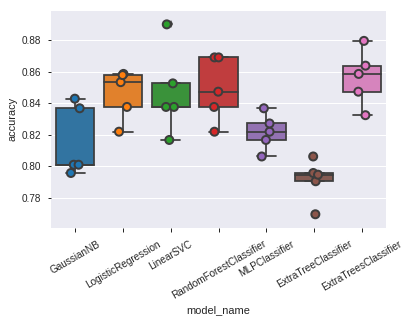

In [36]:
g = sns.boxplot(x='model_name', y='accuracy', data=cv_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [37]:
accuracy_mean = cv_df.groupby('model_name').accuracy.mean()
print("Mean of the Accuracy by Model:\n{}".format(accuracy_mean))

Mean of the Accuracy by Model:
model_name
ExtraTreeClassifier       0.791408
ExtraTreesClassifier      0.856385
GaussianNB                0.815536
LinearSVC                 0.846966
LogisticRegression        0.845924
MLPClassifier             0.821819
RandomForestClassifier    0.849055
Name: accuracy, dtype: float64
